# Importing Libraries

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

### Resizing all images

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [3]:
# Importing the Vgg 16 library and adding preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# Don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('cell_images/Train/*')

In [6]:
folders

['cell_images/Train\\Parasite', 'cell_images/Train\\Uninfected']

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [8]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('cell_images/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('cell_images/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 21570 images belonging to 2 classes.
Found 5988 images belonging to 2 classes.


In [13]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12868\708679198.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
675/675 [==============================] - 8511s 13s/step - loss: 0.4061 - accuracy: 0.8206 - val_loss: 0.3507 - val_accuracy: 0.8544
Epoch 2/5
675/675 [==============================] - 17012s 25s/step - loss: 0.3108 - accuracy: 0.8761 - val_loss: 0.4510 - val_accuracy: 0.8297
Epoch 3/5
675/675 [==============================] - 9434s 14s/step - loss: 0.2846 - accuracy: 0.8902 - val_loss: 0.3644 - val_accuracy: 0.8687
Epoch 4/5
675/675 [==============================] - 12633s 19s/step - loss: 0.2730 - accuracy: 0.8970 - val_loss: 0.2538 - val_accuracy: 0.9080
Epoch 5/5
675/675 [==============================] - 9171s 14s/step - loss: 0.2740 - accuracy: 0.8969 - val_loss: 0.1789 - val_accuracy: 0.9372


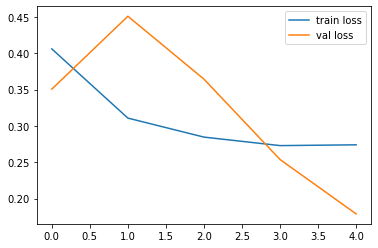

<Figure size 432x288 with 0 Axes>

In [14]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

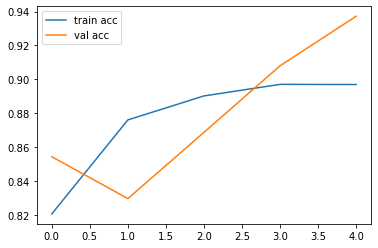

<Figure size 432x288 with 0 Axes>

In [15]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
import tensorflow as tf
from keras.models import load_model
model.save('model_vgg19.h5')